In [1]:
from sympy import *
import heppackv0 as hep

Reading heppackv0.py

Done


In [2]:
theta,u,t,t0=symbols('theta u t t0',real=True)
E1,E2,p,M,s,s0=symbols('E1 E2 p M s s0',positive=True)

## 1) Kinematics
Amplitudes and cross section for Compton scattering $\gamma_V+e\rightarrow\gamma+e$ with an incoming virtual photon of mass $M$.
Energy momentum conservation reads $k_i+p_i=k_f+p_f$. The CM system is used where  $E_2,\theta$ denote the outgoing photon energy and scattering angle and $E_1$ the energy of the incoming electron. Obviously $E_2$ is also the energy of the outgoing electronand therefore $E_\gamma=2E_2-E_1$ is taken from energy conservation. With $t=-4E_1E_2\sin^2(\theta/2)$, $u=-4E_1E_2\cos^2(\theta/2)$ and $s=4E_2^2$ we get

$$ M^2=s+t+u=4E_2^2-4E_1E_2\enspace ,$$ 

which in calling the Python routines is named $M_0$. We also use 
the abbreviation $s_0=s-M^2=4E_1E_2$. 

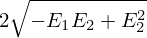

In [3]:
M0=2*sqrt(E2**2-E1*E2);M0

In [4]:
kin=[2*E2-E1,M0,0,0]
kout=[E2,0,theta,0]
pin=[E1,0,pi,pi]
pout=[E2,0,pi-theta,pi]

In [5]:
E1divE2=s0/s;E1divE2

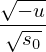

In [6]:
costhetahalf=sqrt(-u/s0);costhetahalf

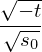

In [7]:
sinthetahalf=sqrt(-t/s0);sinthetahalf

In [8]:
Etwo=sqrt(s)/2;Etwo

## 2) The Amplitudes

Due to the additional helicity $\lambda_1=0$  for the incoming photons  we have now 12 independent amplitudes
$T_{fi}=T_{\lambda_3 \lambda_4;\lambda_1 \lambda_2}$. The outgoung photon is real ($\lambda_3 =\pm 1$). 
Neglecting the mass of the electrons the calculation is easy.

$T1=T_{--;--}$ :

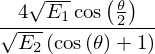

In [9]:
h1=simplify(hep.compt(kin,-1,pin,-1,kout,-1,pout,-1));h1

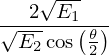

In [10]:
h2=2*sqrt(E1)/sqrt(E2)/cos(theta/2);h2

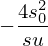

In [11]:
T1sq=4*E1divE2/costhetahalf**2;T1sq

$T2=T_{-+;--}$ :

In [12]:
T2=simplify(hep.compt(kin,-1,pin,-1,kout,-1,pout,1));T2

$T3=T_{++;--}$ :

In [13]:
T3=simplify(hep.compt(kin,-1,pin,-1,kout,1,pout,1));T3

$T4=T_{+-;--}$ :

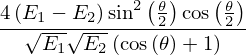

In [14]:
T4=simplify(hep.compt(kin,-1,pin,-1,kout,1,pout,-1));T4

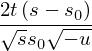

In [15]:
T4=simplify(2*sinthetahalf**2/costhetahalf*(E1divE2-1)/sqrt(E1divE2));T4

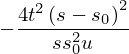

In [16]:
T4sq=simplify(T4**2);T4sq

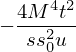

In [17]:
T4sq=-4*t**2*M**4/s/s0**2/u;T4sq

$T5=T_{--;+-}$ :

In [18]:
T5=simplify(hep.compt(kin,1,pin,-1,kout,-1,pout,-1));T5

$T6=T_{-+;+-}$ :

In [19]:
T6=simplify(hep.compt(kin,1,pin,-1,kout,-1,pout,1));T6

$T7=T_{++;+-}$ :

In [20]:
T7=simplify(hep.compt(kin,1,pin,-1,kout,1,pout,1));T7

$T8=T_{+-;+-}$ :

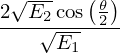

In [21]:
T8=simplify(hep.compt(kin,1,pin,-1,kout,1,pout,-1));T8

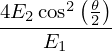

In [22]:
T8sq=4*E2*cos(theta/2)**2/E1;T8sq

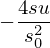

In [23]:
T8sq=simplify(4*costhetahalf**2/E1divE2);T8sq

$T9=T_{--;0-}$ :

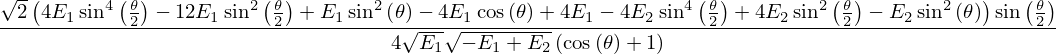

In [24]:
T9=simplify(hep.compt(kin,0,pin,-1,kout,-1,pout,-1));T9

It is hard to convince Sympy that the terms in the brackets of the numerator add up to 0. One does it by hand by collecting all trigonometric function multiplying $E_1$ and $E_2$ separately and proving that both are identical 0.

In [25]:
T9=0;T9

$T10=T_{-+;0-}$ :

In [26]:
T10=simplify(hep.compt(kin,0,pin,-1,kout,-1,pout,1));T10

$T11=T_{++;0-}$ :

In [27]:
T11=simplify(hep.compt(kin,0,pin,-1,kout,1,pout,1));T11

$T12=T_{+-;0-}$ :

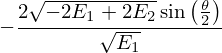

In [28]:
h3=simplify(hep.compt(kin,0,pin,-1,kout,1,pout,-1));h3

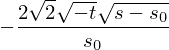

In [29]:
h4=-2*sqrt(2)*simplify(sqrt(1-E1divE2)*sinthetahalf/sqrt(E1divE2));h4

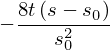

In [30]:
T12sq=h4**2;T12sq

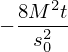

In [31]:
T12sq=-8*t*M**2/s0**2;T12sq

## 3) Cross section

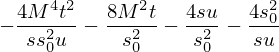

In [32]:
sig1=T1sq+T4sq+T8sq+T12sq;sig1

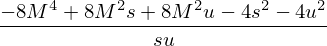

In [33]:
simplify(sig1.subs(t,-s0-u).subs(s0,s-M**2))

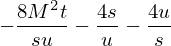

In [34]:
sig=-8*M**2*t/s/u-4*s/u-4*u/s;sig